In [261]:
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from itertools import product
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Good resource for datasets: [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)

## Pandas and Boston dataset

First we will look at a simple dataset using Pandas.

In [262]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [264]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


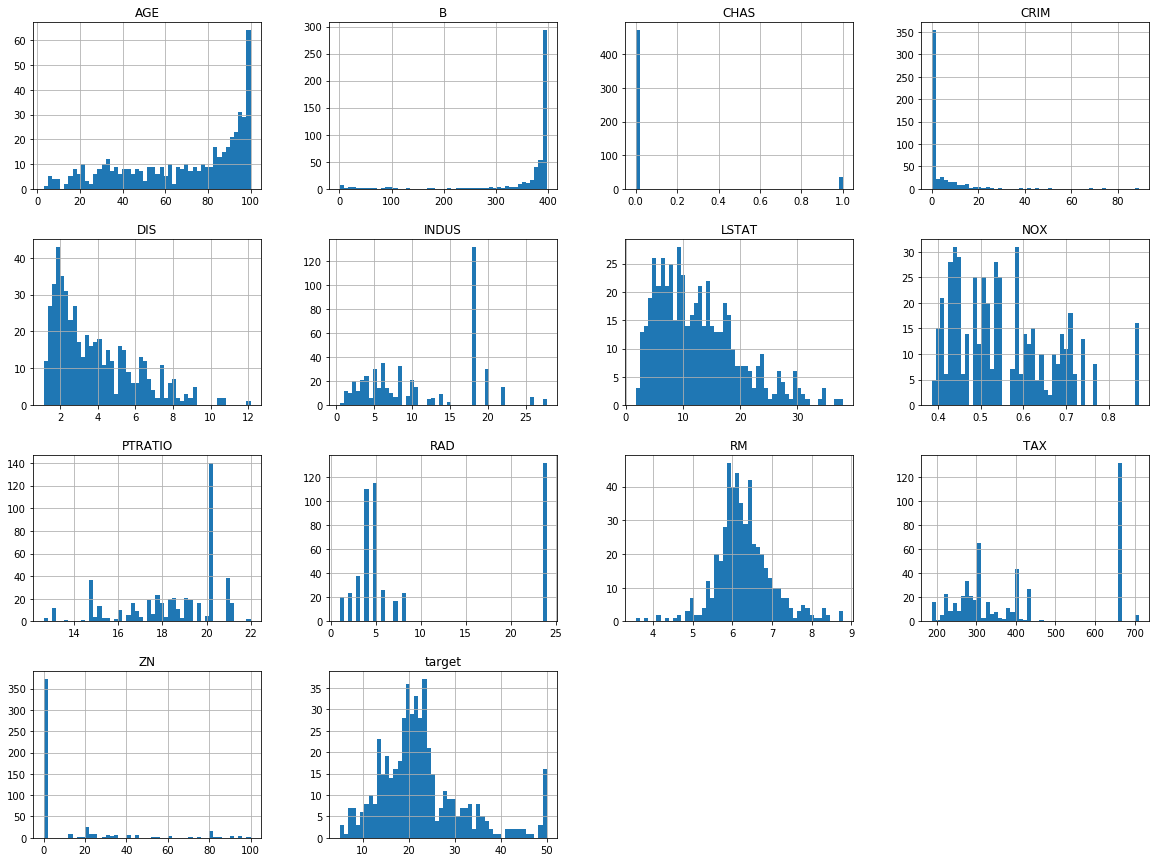

In [265]:
df.hist(bins=50, figsize=(20,15))
plt.show()

What can you tell about the data?

## Train and Test split

We will randomly split data into train and test sets to prevent overfitting.

In [266]:
np.random.seed(42)
mask = np.random.rand(df.shape[0]) <= 0.7

print('Train set shape {0}, test set shape {1}'.format(df[mask].shape, df[~mask].shape))

Train set shape (351, 14), test set shape (155, 14)


## Linear model

In [267]:
lr = LinearRegression()
lr.fit(df.iloc[mask, :-1], df.iloc[mask, -1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's make prediction on test set and evaluate it using MSE.

In [268]:
pred = lr.predict(df.iloc[~mask, :-1])
print('MSE = {0:.04f}'.format(np.mean((pred - df.iloc[~mask, -1])**2)))

MSE = 22.6197


**Question:** how sure are we and what error are we expected to see?

## How can we improve?

There are some outliers, can we simply drop them?

In [269]:
df_filtered = df.drop(['CHAS', 'B', 'CRIM'], axis=1)

In [270]:
lr = LinearRegression()
lr.fit(df_filtered.iloc[mask, :-1], df_filtered.iloc[mask, -1])
pred = lr.predict(df_filtered.iloc[~mask, :-1])
print('MSE = {0:.04f}'.format(np.mean((pred - df_filtered.iloc[~mask, -1])**2)))

MSE = 20.7628


## More data?

It is easy to generate new columns, for example we can try to add multiples of each column pairs.

In [271]:
df_multiples = df.copy()

for a, b in product(df_multiples.columns[:-1], repeat=2):
    df_multiples[a + '_' + b] = df_multiples[a] * df_multiples[b]
print('df_multiples shape -', df_multiples.shape)

lr = LinearRegression()
lr.fit(df_multiples[mask].drop('target', axis=1), df_multiples[mask]['target'])
pred = lr.predict(df_multiples[~mask].drop('target', axis=1))
print('MSE = {0:.04f}'.format(np.mean((pred - df_multiples[~mask]['target'])**2)))

df_multiples shape - (506, 183)
MSE = 10.5274


Think about what happened there and why it worked? Can you make it better?

# Larger dataset

Next we will play with slightly more interesting dataset: [download it from here](https://github.com/trokas/ai_primer/data/housing.csv)

In [272]:
housing = pd.read_csv('data/housing.csv')
housing.info()
np.random.seed(42)
mask = np.random.rand(housing.shape[0]) > 0.7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Task 1. Describe and plot this data.

### Task 2. Plot geo data.

### Task 3. Use scatter_matrix to explore correlations  

### Task 4. Make simple benchmark model on numeric columns.

What MSE do you get?

### Task 5. Add more handcrafter columns.

Try to add easily interpretable columns. Can you improve MSE?

### Task 6. Use one hot encoder for ocean_proximity

Does it improve MSE?

### Task 7. Reduce MSE by handcrafting even more columns!

Beat 50k!

### Task 8. Try to use RandomForest

We will explore how it works later.